# Square Lattice

In [1]:
using FreeBird
using Plots

In [2]:
L = 4
M = 4
N = 2
lattice_type = :square
nn_interaction_energy = -0.01u"eV"
adsorption_energy = (4 * nn_interaction_energy)
nnn_interaction_energy = (nn_interaction_energy / 4)
lg = LGHamiltonian(adsorption_energy, nn_interaction_energy, nnn_interaction_energy)
energies = AbstractWalkers.exact_enumeration(L, M, N, lattice_type, lg)

120-element Vector{Quantity{Float64, 𝐋² 𝐌 𝐓⁻², Unitful.FreeUnits{(eV,), 𝐋² 𝐌 𝐓⁻², nothing}}}:
   -0.09 eV
   -0.08 eV
   -0.09 eV
   -0.09 eV
 -0.0825 eV
   -0.08 eV
   -0.08 eV
   -0.08 eV
   -0.08 eV
   -0.08 eV
          ⋮
   -0.08 eV
 -0.0825 eV
   -0.09 eV
   -0.09 eV
   -0.08 eV
   -0.09 eV
   -0.09 eV
   -0.08 eV
   -0.09 eV

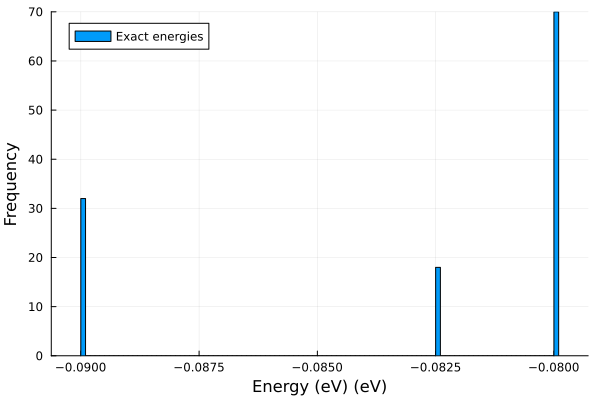

In [50]:
# Plot a histogram of the energies
histogram(energies, bins=100, label="Exact energies", xlabel="Energy (eV)", ylabel="Frequency", legend=:topleft)

In [51]:
# Calculate the constant-volume heat capacity

# Calculate the partition function
ωi = ones(length(energies))
Ei = zeros(length(energies))
for (i, E) in enumerate(energies)
    Ei[i] = ustrip(E)
end
Ei = Ei .- minimum(Ei)
Ts = collect(10:1:200)
kb = 8.617333262e-5 # eV/K
β = 1 ./(kb.*Ts)
dof = 0
Zs = [partition_function(b, ωi, Ei) for b in β]
U = [internal_energy(b, ωi, Ei) for b in β]
cvs = [cv(b, ωi, Ei, dof) for b in β]

191-element Vector{Float64}:
 8.410328159204169e-7
 1.6603029140997282e-6
 2.9153601721765196e-6
 4.673779303626708e-6
 6.970168851739461e-6
 9.804402158600153e-6
 1.314454053293343e-5
 1.6932650251696455e-5
 2.109190787590941e-5
 2.5533809419149935e-5
 ⋮
 6.874333459630657e-6
 6.799694253803846e-6
 6.726236051655703e-6
 6.653934652026424e-6
 6.582766455112919e-6
 6.512708445120153e-6
 6.443738173475117e-6
 6.375833742583058e-6
 6.308973790106912e-6

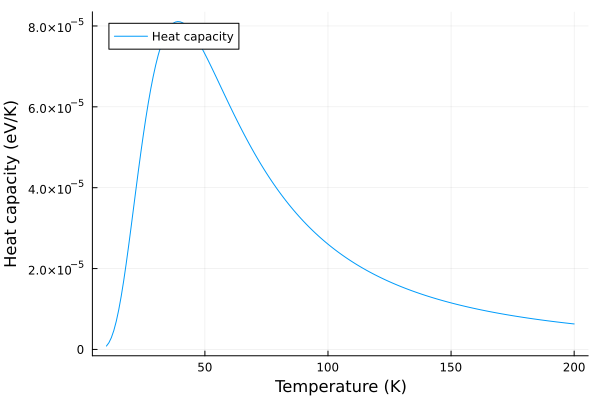

In [53]:
# Plot the heat capacity
plot(Ts, cvs, label="Heat capacity", xlabel="Temperature (K)", ylabel="Heat capacity (eV/K)", legend=:topleft)